# Task 1: Data Analysis for earnings.csv
This notebook analyzes the earnings.csv file to check for missing data and count observations.


In [2]:
import pandas as pd

df = pd.read_csv('earnings.csv', sep=';')

print("Basic information about the dataframe:")
print(f"Number of observations (rows): {len(df)}")


Basic information about the dataframe:
Number of observations (rows): 11000


In [3]:
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_summary = pd.DataFrame({
    'Column': df.columns,
    'Missing Values': missing_values,
    'Percentage Missing': missing_percentage.round(2)
})

total_missing = df.isnull().sum().sum()
if total_missing == 0:
    print("The dataset has no missing values.")
else:
    print(f"The dataset has {total_missing} missing values across all columns.")


The dataset has no missing values.


There are 11 000 observations in the dataset and no missing values. The dataset contains a total of 14 variables (one additional column contains an ID number). Of these variables:
* Five are qualitative (rows 6–10): sector, section_07, sex, education, contract
* Nine are quantitative (rows 2–5 and 11–15): base, bonus, overtime_pay, other, age, duration_total, duration_entity, duration_nominal, duration_overtime


In [7]:
print("\n--- Descriptive Statistics for Qualitative Variables ---\n")

qualitative_vars = ['sector', 'section_07', 'sex', 'education', 'contract']

sex_dict = {
    1: 'man',
    2: 'woman'
}

sector_dict = {
    1: 'public',
    2: 'private'
}

section_07_dict = {
    1: 'Public Administration and Defence; Compulsory Social Security',
    2: 'Education',
    3: 'Human Health and Social Work Activities'
}

contract_dict = {
    1: 'for an indefinite period',
    2: 'for a definite period'
}

education_dict = {
    1: 'doctorate',
    2: 'higher',
    3: 'post-secondary',
    4: 'secondary',
    5: 'basic vocational',
    6: 'middle school and below'
}

for var in qualitative_vars:
    print(f"\nFrequency table for {var}:")
    freq_table = df[var].value_counts().reset_index()
    freq_table.columns = [var, 'Count']
    freq_table['Percentage'] = (freq_table['Count'] / len(df) * 100).round(2)

    if var == 'sex':
        freq_table['Label'] = freq_table['sex'].map(sex_dict)
    elif var == 'sector':
        freq_table['Label'] = freq_table['sector'].map(sector_dict)
    elif var == 'section_07':
        freq_table['Label'] = freq_table['section_07'].map(section_07_dict)
    elif var == 'education':
        freq_table['Label'] = freq_table['education'].map(education_dict)
    elif var == 'contract':
        freq_table['Label'] = freq_table['contract'].map(contract_dict)

    print(freq_table)



--- Descriptive Statistics for Qualitative Variables ---


Frequency table for sector:
   sector  Count  Percentage    Label
0       1  10548       95.89   public
1       2    452        4.11  private

Frequency table for section_07:
   section_07  Count  Percentage  \
0           2   5867       53.34   
1           3   2732       24.84   
2           1   2401       21.83   

                                               Label  
0                                          Education  
1            Human Health and Social Work Activities  
2  Public Administration and Defence; Compulsory ...  

Frequency table for sex:
   sex  Count  Percentage  Label
0    2   8289       75.35  woman
1    1   2711       24.65    man

Frequency table for education:
   education  Count  Percentage                    Label
0          2   6633       60.30                   higher
1          4   1983       18.03                secondary
2          5    906        8.24         basic vocational
3          3   

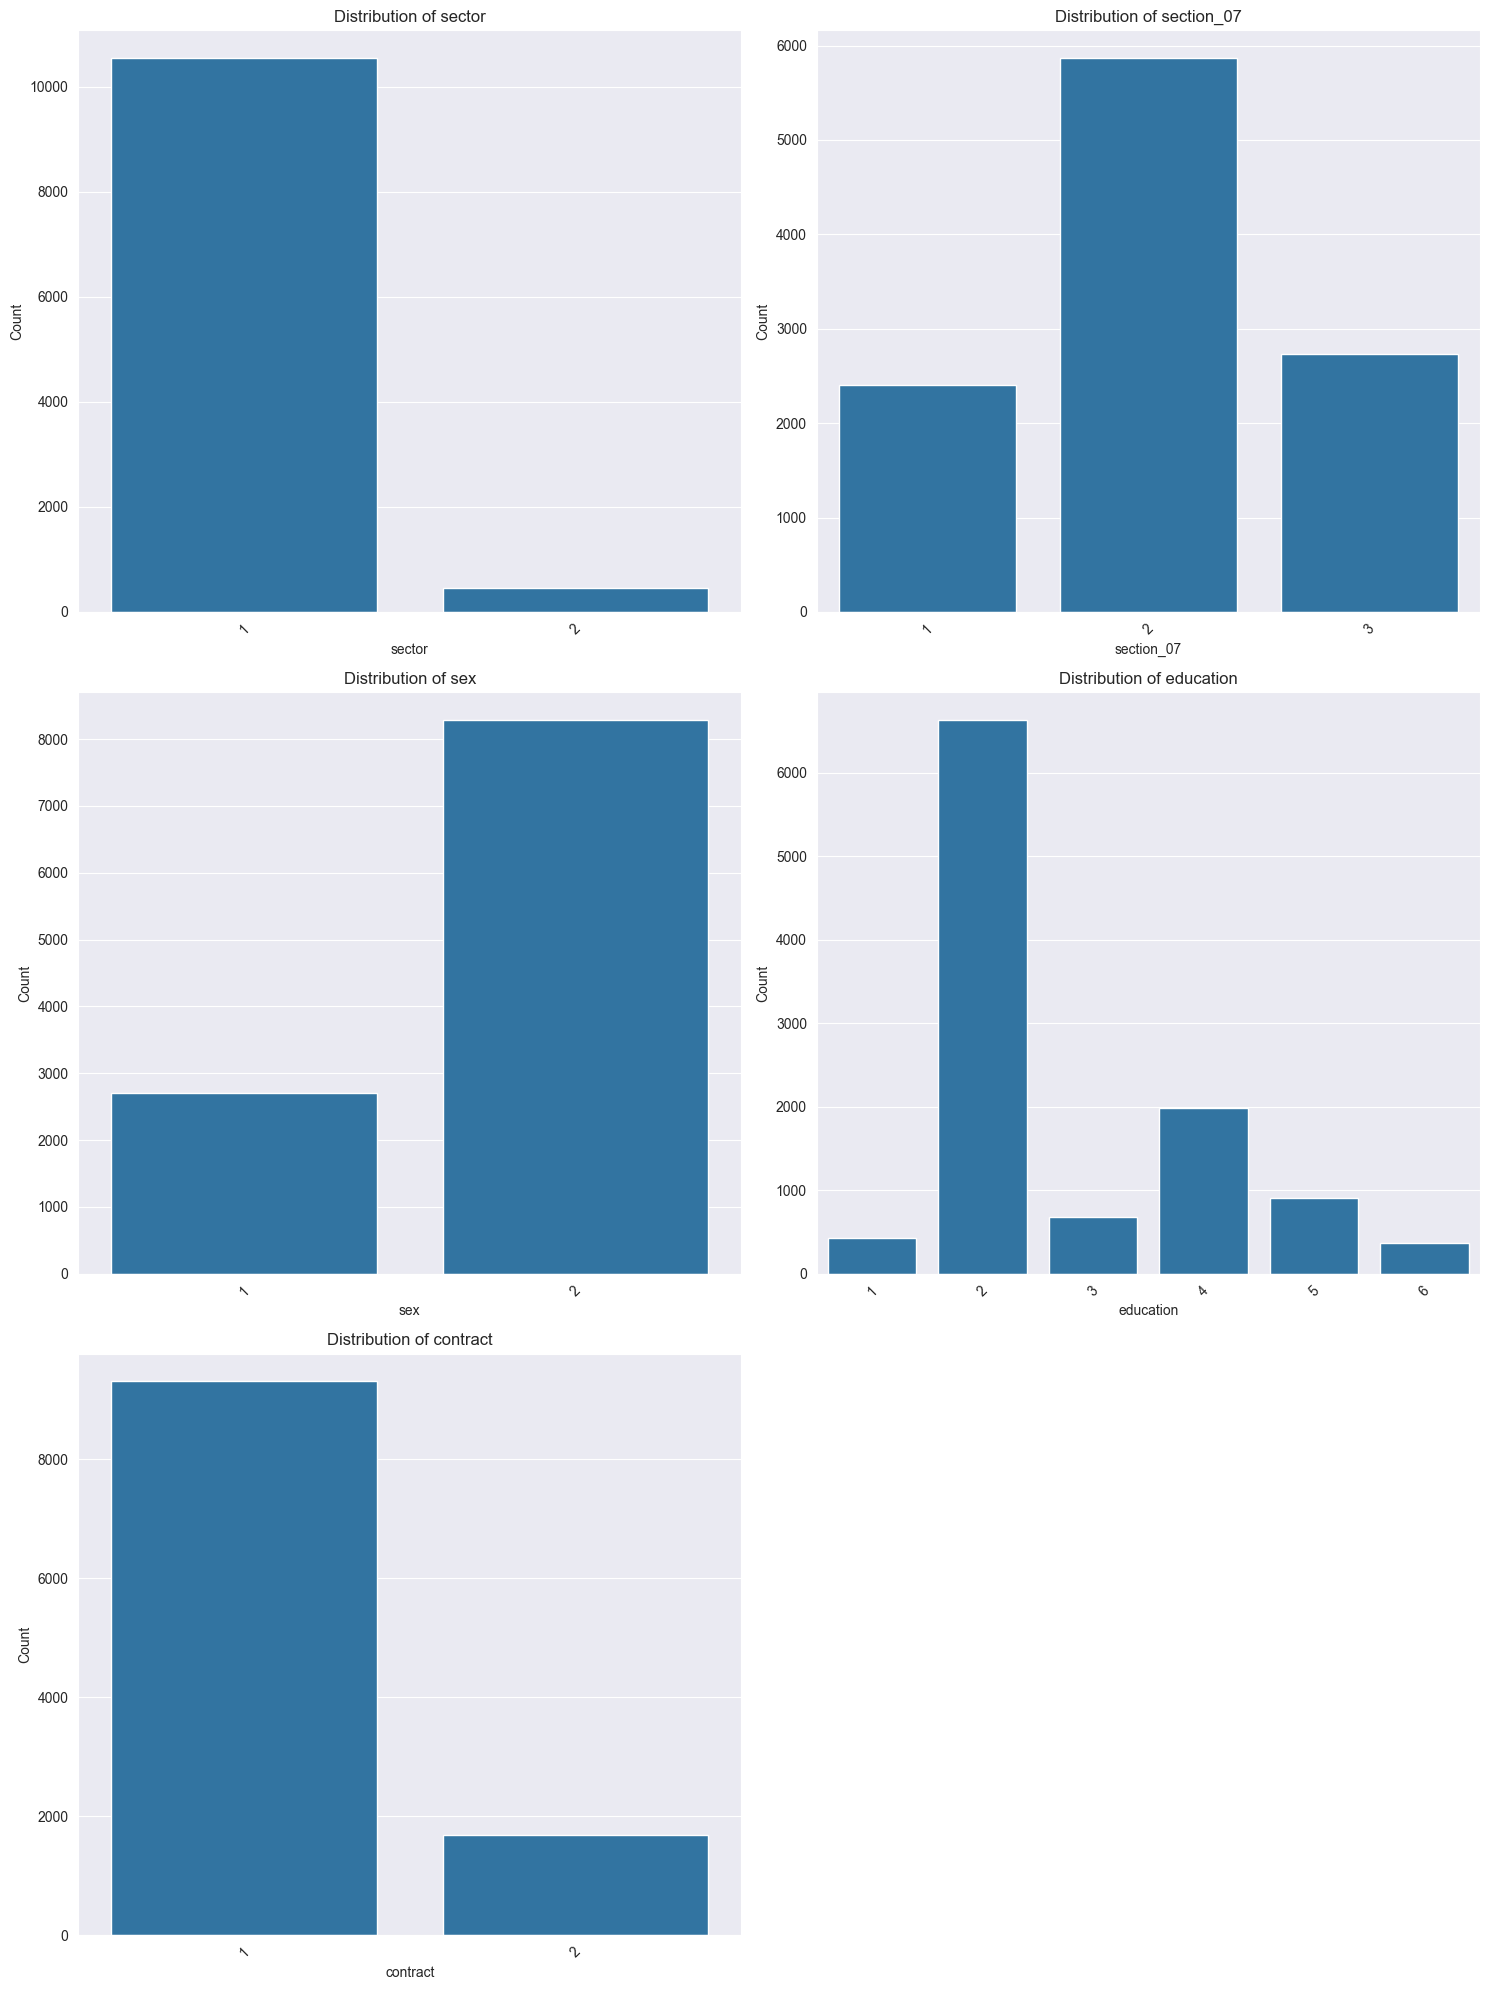

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 20))
for i, var in enumerate(qualitative_vars):
    plt.subplot(3, 2, i+1)

    df_plot = df.copy()

    if var == 'sex':
        df_plot['sex_label'] = df_plot['sex'].map(sex_dict)
        sns.countplot(x='sex_label', data=df_plot)
        plt.title(f'Distribution of sex')
        plt.xlabel('Sex')
    elif var == 'sector':
        df_plot['sector_label'] = df_plot['sector'].map(sector_dict)
        sns.countplot(x='sector_label', data=df_plot)
        plt.title(f'Distribution of sector')
        plt.xlabel('Sector')
    elif var == 'section_07':
        df_plot['section_07_label'] = df_plot['section_07'].map(section_07_dict)
        sns.countplot(x='section_07_label', data=df_plot)
        plt.title(f'Distribution of NACE section')
        plt.xlabel('NACE Section')
    elif var == 'education':
        df_plot['education_label'] = df_plot['education'].map(education_dict)
        sns.countplot(x='education_label', data=df_plot)
        plt.title(f'Distribution of education')
        plt.xlabel('Education Level')
    elif var == 'contract':
        df_plot['contract_label'] = df_plot['contract'].map(contract_dict)
        sns.countplot(x='contract_label', data=df_plot)
        plt.title(f'Distribution of contract')
        plt.xlabel('Contract Type')

    plt.ylabel('Count')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [9]:
print("\n--- Descriptive Statistics for Quantitative Variables ---\n")

quantitative_vars = ['base', 'bonus', 'overtime_pay', 'other', 
                     'age', 'duration_total', 'duration_entity', 
                     'duration_nominal', 'duration_overtime']

quant_stats = df[quantitative_vars].describe().T
quant_stats['variance'] = df[quantitative_vars].var()
quant_stats = quant_stats.round(2)
print(quant_stats)



--- Descriptive Statistics for Quantitative Variables ---

                     count      mean       std    min       25%       50%  \
base               11000.0  33376.74  19276.55  10.00  20995.12  31341.25   
bonus              11000.0   2128.49   4966.44   0.00      0.00    620.00   
overtime_pay       11000.0   1679.27   5407.96   0.00      0.00      0.00   
other              11000.0   2477.63   3715.42   0.00      0.00   2141.82   
age                11000.0     42.47     10.01  19.00     34.00     43.00   
duration_total     11000.0     18.57     11.00   0.01      9.03     19.04   
duration_entity    11000.0     11.40      9.32   0.01      3.07      9.10   
duration_nominal   11000.0   1301.31    540.19  12.80    766.80   1591.90   
duration_overtime  11000.0     47.70    111.96   0.00      0.00      0.00   

                        75%        max      variance  
base               41348.29  241624.39  3.715854e+08  
bonus               2940.72  258061.00  2.466557e+07  
over

In [ ]:
plt.figure(figsize=(20, 25))
for i, var in enumerate(quantitative_vars):
    plt.subplot(5, 2, i+1)
    sns.histplot(df[var], kde=True)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(20, 25))
for i, var in enumerate(quantitative_vars):
    plt.subplot(5, 2, i+1)
    sns.boxplot(x=df[var])
    plt.title(f'Box plot of {var}')
    plt.xlabel(var)

plt.tight_layout()
plt.show()


base: Best fitting distribution is lognorm (AIC=244985.83)


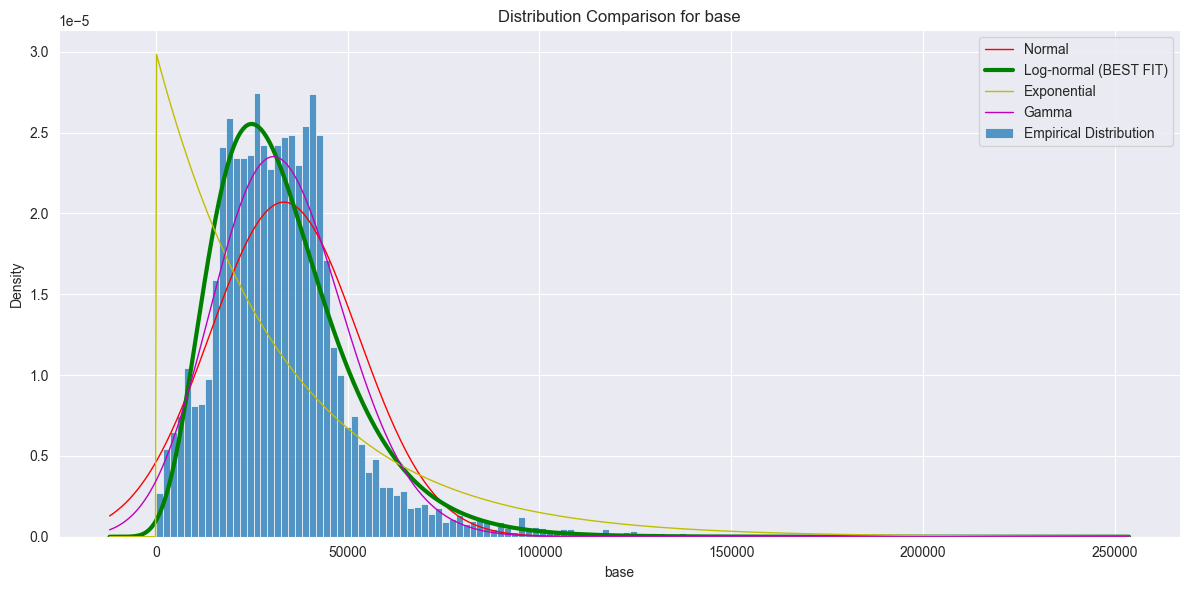

bonus: Best fitting distribution is expon (AIC=190593.66)


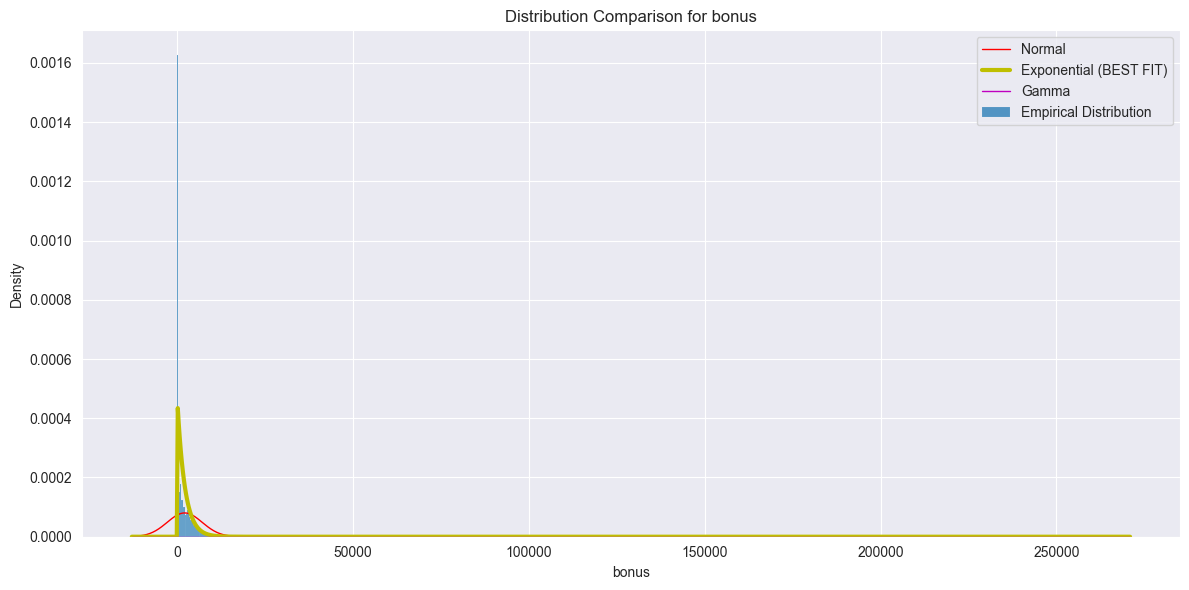

overtime_pay: Best fitting distribution is expon (AIC=185378.57)


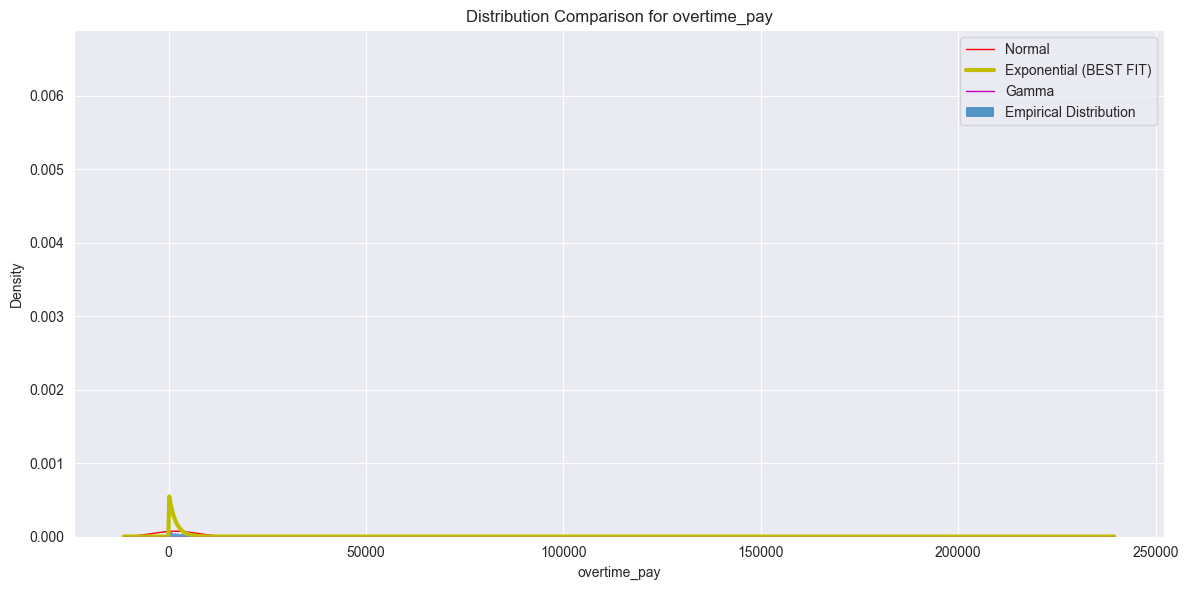

other: Best fitting distribution is expon (AIC=193935.23)


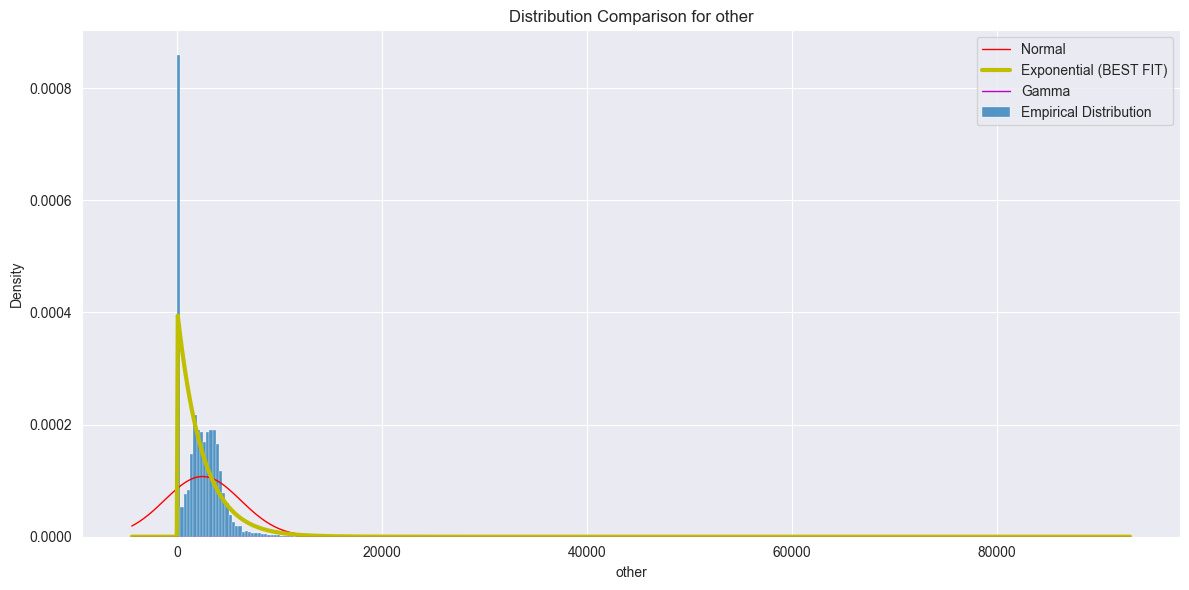

age: Best fitting distribution is norm (AIC=81903.21)


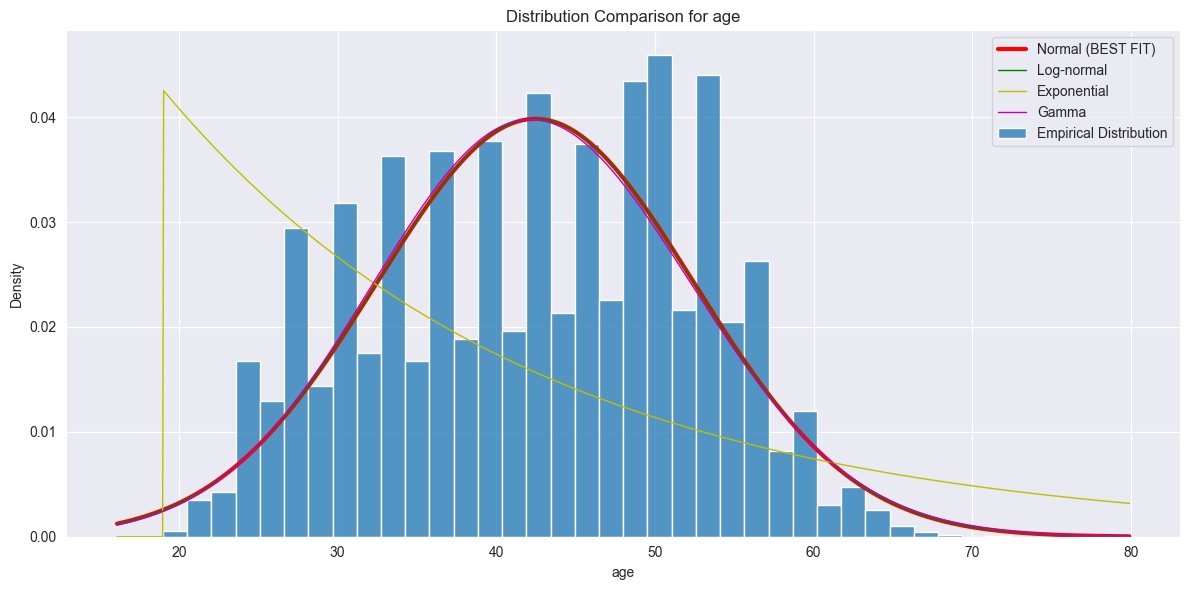

duration_total: Best fitting distribution is lognorm (AIC=83959.79)


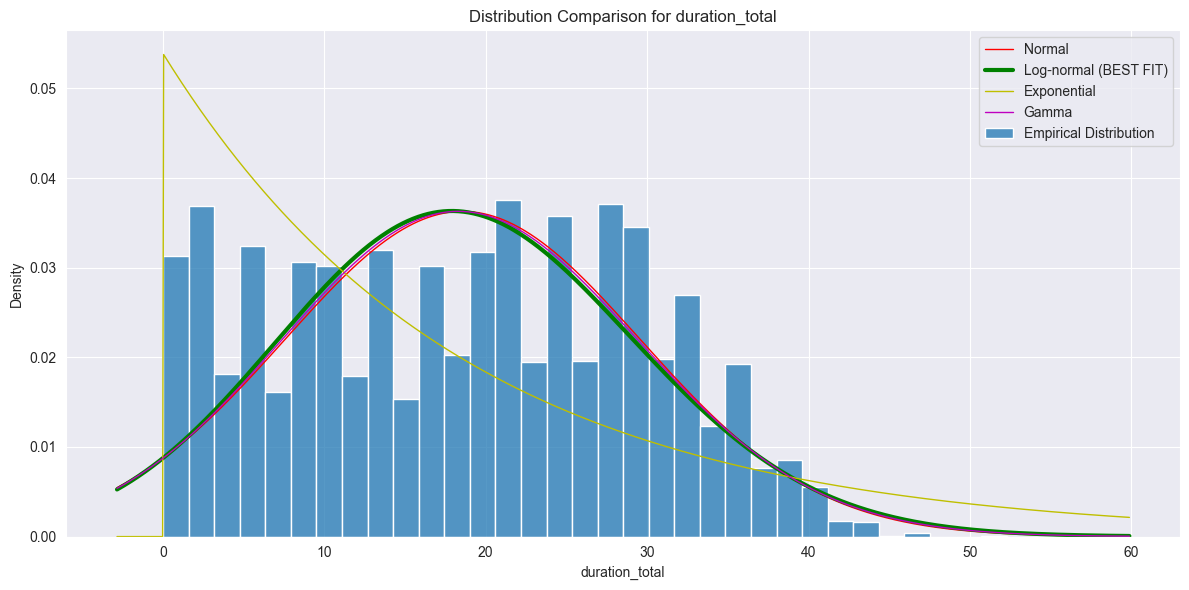

duration_entity: Best fitting distribution is gamma (AIC=74237.16)


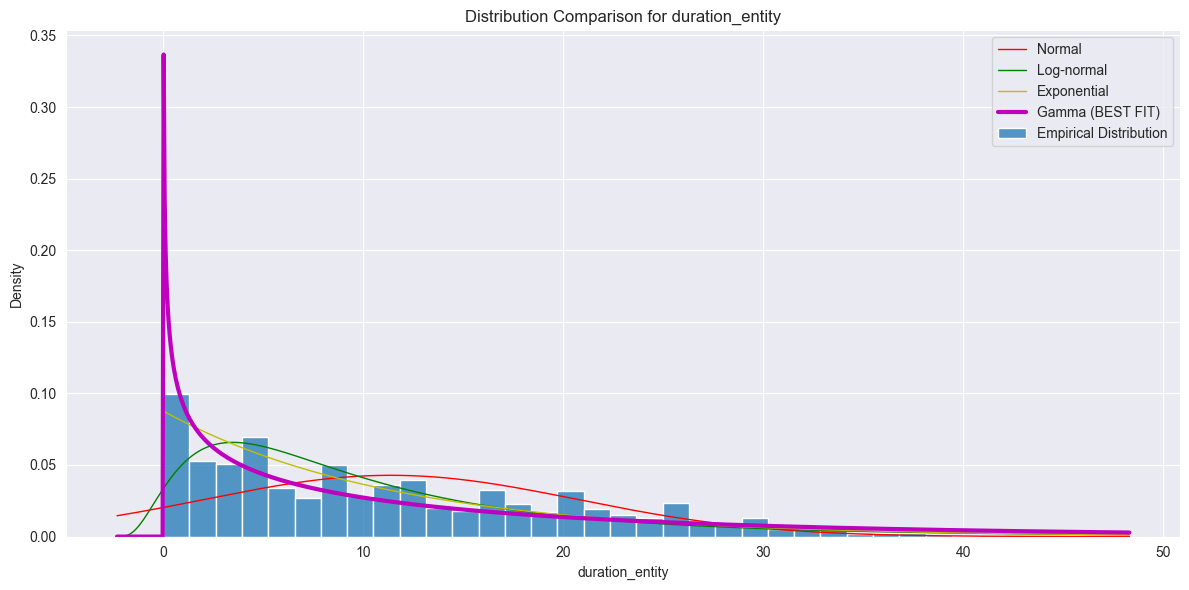

duration_nominal: Best fitting distribution is norm (AIC=169641.88)


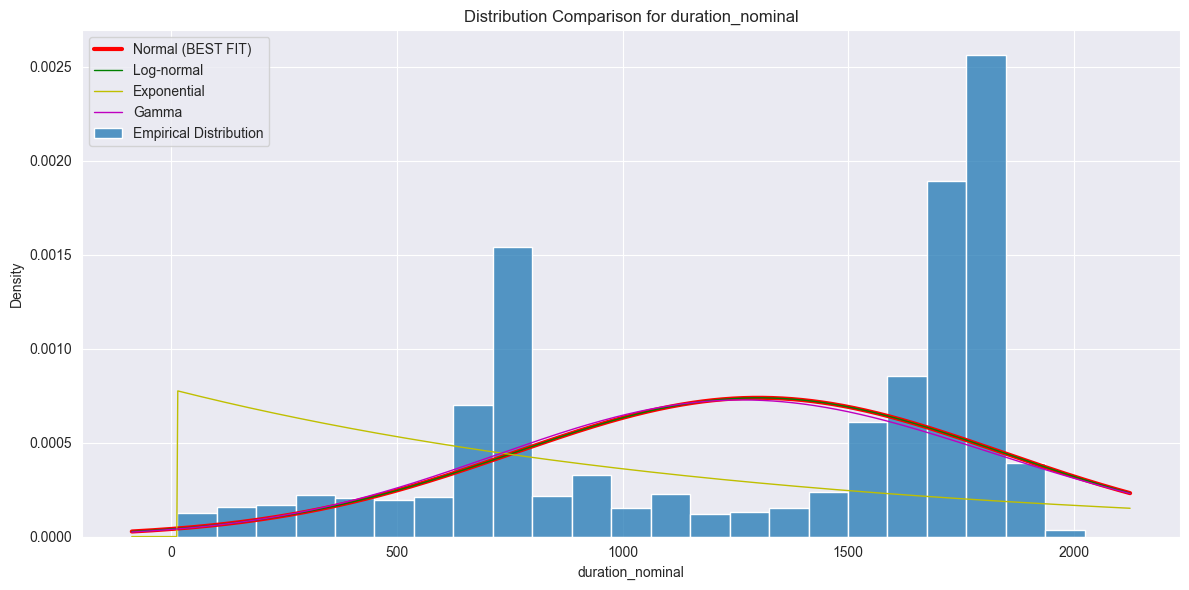

duration_overtime: Best fitting distribution is gamma (AIC=-414754.57)


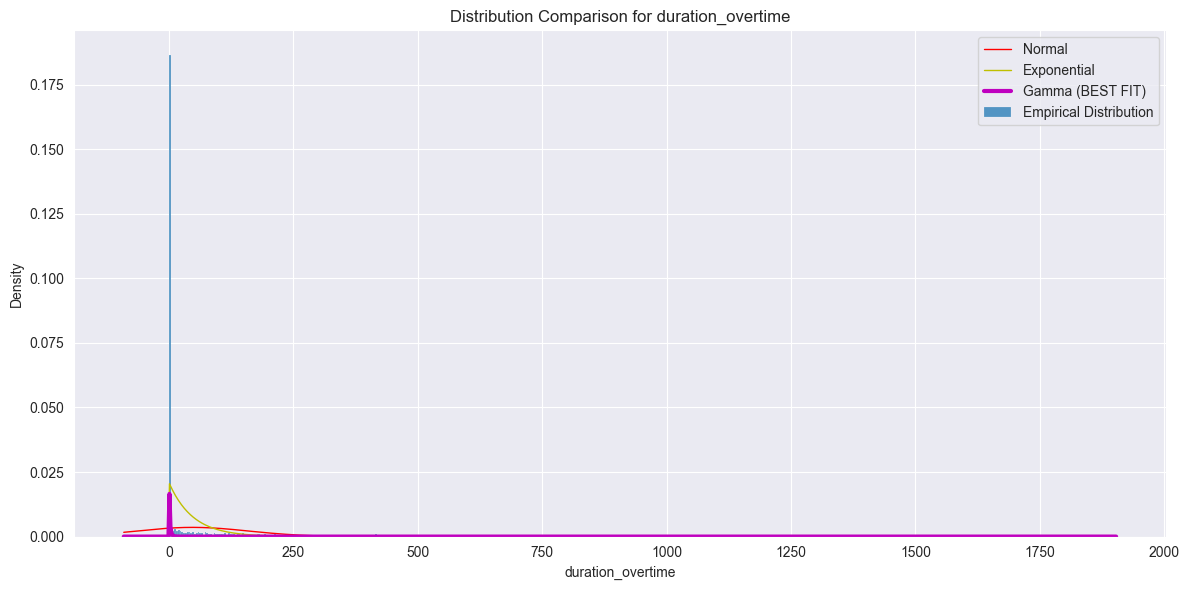

In [22]:
from scipy import stats

def find_best_distribution(data, var_name):
    # List of distributions to test
    distributions = ['norm', 'lognorm', 'expon', 'gamma']
    best_distribution = None
    best_params = None
    best_aic = np.inf

    # For AIC calculation
    n = len(data)

    for distribution in distributions:
        # Skip distributions that don't apply to the data
        if distribution == 'lognorm' and data.min() <= 0:
            continue

        try:
            # Fit distribution
            if distribution == 'norm':
                params = stats.norm.fit(data)
                aic = 2 * 2 - 2 * np.sum(stats.norm.logpdf(data, *params))  # 2 parameters
            elif distribution == 'lognorm':
                params = stats.lognorm.fit(data)
                aic = 2 * 3 - 2 * np.sum(stats.lognorm.logpdf(data, *params))  # 3 parameters
            elif distribution == 'expon':
                params = stats.expon.fit(data)
                aic = 2 * 2 - 2 * np.sum(stats.expon.logpdf(data, *params))  # 2 parameters
            elif distribution == 'gamma':
                params = stats.gamma.fit(data)
                aic = 2 * 3 - 2 * np.sum(stats.gamma.logpdf(data, *params))  # 3 parameters

            # Update best distribution if this one's better
            if aic < best_aic:
                best_distribution = distribution
                best_params = params
                best_aic = aic

        except Exception as e:
            continue

    # Print the best distribution
    print(f"{var_name}: Best fitting distribution is {best_distribution} (AIC={best_aic:.2f})")
    return best_distribution, best_params

def plot_distribution_comparison(data, var_name, best_dist):
    plt.figure(figsize=(12, 6))

    ax = sns.histplot(data, kde=False, stat="density", label="Empirical Distribution")

    x_min, x_max = plt.xlim()
    x = np.linspace(x_min, x_max, 1000)

    dist_styles = {
        'norm': ('r-', 'Normal'),
        'lognorm': ('g-', 'Log-normal'),
        'expon': ('y-', 'Exponential'),
        'gamma': ('m-', 'Gamma')
    }

    # Plot normal distribution
    if data.min() <= 0 and best_dist == 'lognorm':
        best_dist = 'norm'

    if True:
        mu, sigma = stats.norm.fit(data)
        pdf_norm = stats.norm.pdf(x, mu, sigma)
        if best_dist == 'norm':
            plt.plot(x, pdf_norm, dist_styles['norm'][0], linewidth=3, label=f'{dist_styles["norm"][1]} (BEST FIT)')
        else:
            plt.plot(x, pdf_norm, dist_styles['norm'][0], linewidth=1, label=f'{dist_styles["norm"][1]}')

    if data.min() > 0:
        shape, loc, scale = stats.lognorm.fit(data)
        pdf_lognorm = stats.lognorm.pdf(x, shape, loc=loc, scale=scale)
        if best_dist == 'lognorm':
            plt.plot(x, pdf_lognorm, dist_styles['lognorm'][0], linewidth=3, label=f'{dist_styles["lognorm"][1]} (BEST FIT)')
        else:
            plt.plot(x, pdf_lognorm, dist_styles['lognorm'][0], linewidth=1, label=f'{dist_styles["lognorm"][1]}')

    if data.min() >= 0:
        loc, scale = stats.expon.fit(data)
        pdf_expon = stats.expon.pdf(x, loc=loc, scale=scale)
        if best_dist == 'expon':
            plt.plot(x, pdf_expon, dist_styles['expon'][0], linewidth=3, label=f'{dist_styles["expon"][1]} (BEST FIT)')
        else:
            plt.plot(x, pdf_expon, dist_styles['expon'][0], linewidth=1, label=f'{dist_styles["expon"][1]}')

        try:
            a, loc, scale = stats.gamma.fit(data)
            pdf_gamma = stats.gamma.pdf(x, a, loc=loc, scale=scale)
            if best_dist == 'gamma':
                plt.plot(x, pdf_gamma, dist_styles['gamma'][0], linewidth=3, label=f'{dist_styles["gamma"][1]} (BEST FIT)')
            else:
                plt.plot(x, pdf_gamma, dist_styles['gamma'][0], linewidth=1, label=f'{dist_styles["gamma"][1]}')
        except:
            pass

    plt.title(f'Distribution Comparison for {var_name}')
    plt.xlabel(var_name)
    plt.ylabel('Density')
    plt.legend()
    plt.tight_layout()
    plt.show()

for var in quantitative_vars:
    best_dist, best_params = find_best_distribution(df[var], var)
    plot_distribution_comparison(df[var], var, best_dist)


For qualitative variables, it can be observed that most employees are woman, have higher education, work in the public sector and have an employment contract for an indefinite period.
For quantitative variables it can be observed that the base pay follows a logarithmic normal distribution, which is expected for a value describing a salary. Age follows a normal distribution, which can be expected if workers gradually enter and exit the workforce as they age. Distribution of workers in the middle of the working age bracket remains fairly constant.
For some quantitative variables, mainly bonus and overtime pay, the number of workers not receiving anything is so high that fitting a standard density function is challenging. This is expected for the public sector, where overtime pay and bonuses are generally rare.

# Task 2: Clustering


For n_clusters = 2, the silhouette score is 0.206
For n_clusters = 3, the silhouette score is 0.222
For n_clusters = 4, the silhouette score is 0.190
For n_clusters = 5, the silhouette score is 0.213
For n_clusters = 6, the silhouette score is 0.207
For n_clusters = 7, the silhouette score is 0.214
For n_clusters = 8, the silhouette score is 0.200
For n_clusters = 9, the silhouette score is 0.205
For n_clusters = 10, the silhouette score is 0.194


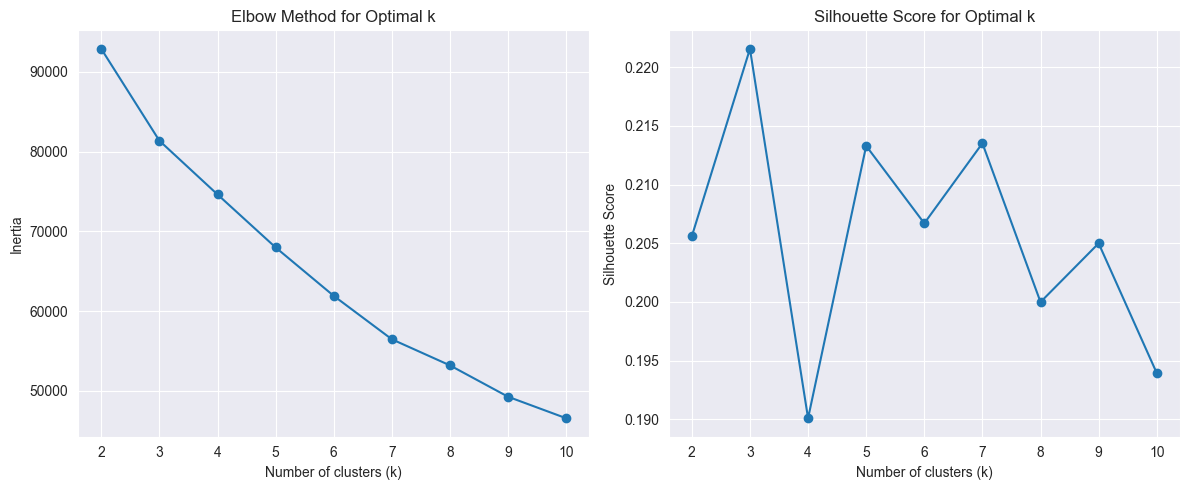

For n_clusters = 2 The average silhouette_score is : 0.2055963185618247


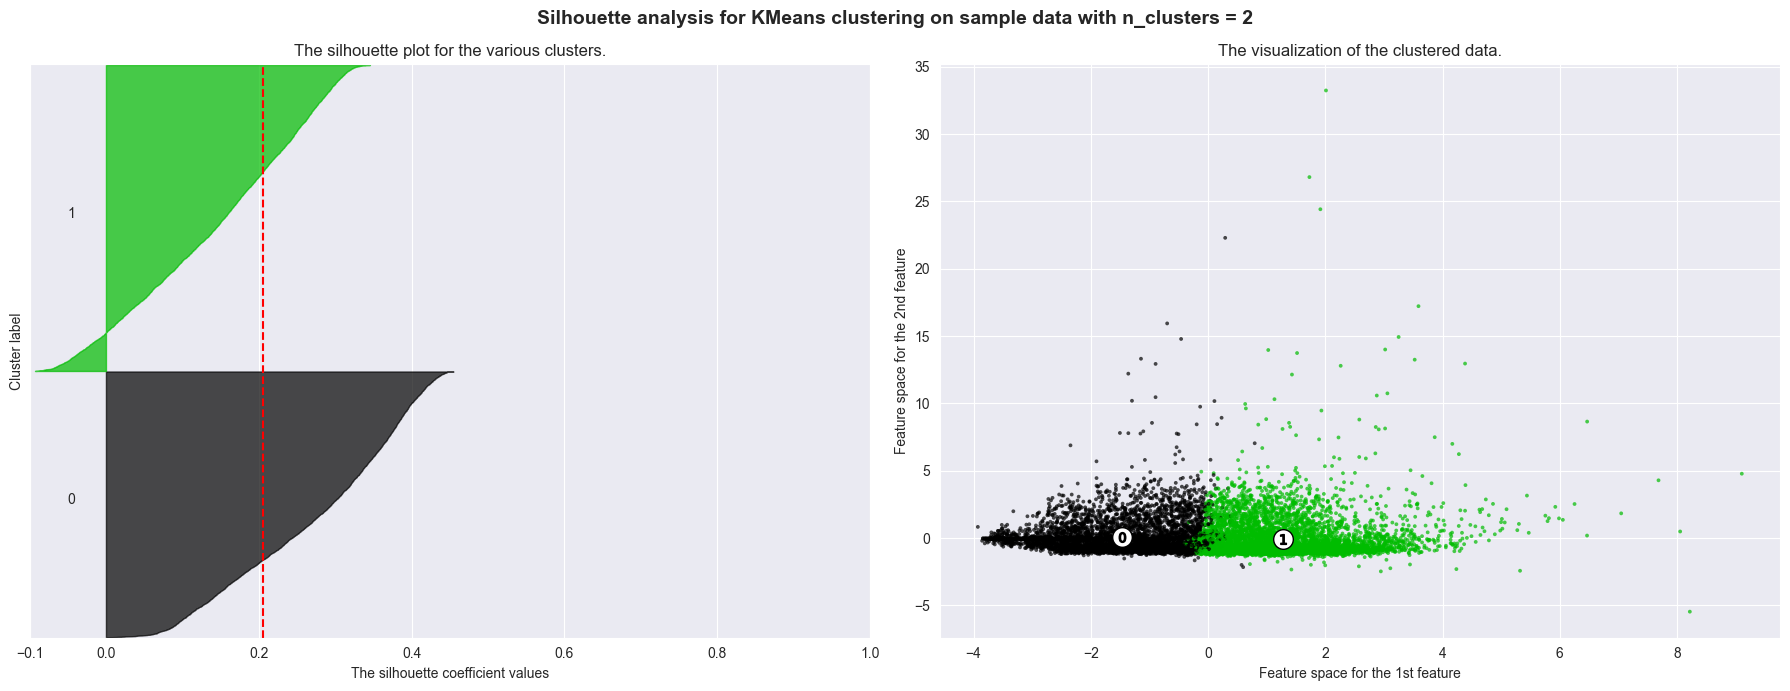

For n_clusters = 3 The average silhouette_score is : 0.22156143909985637


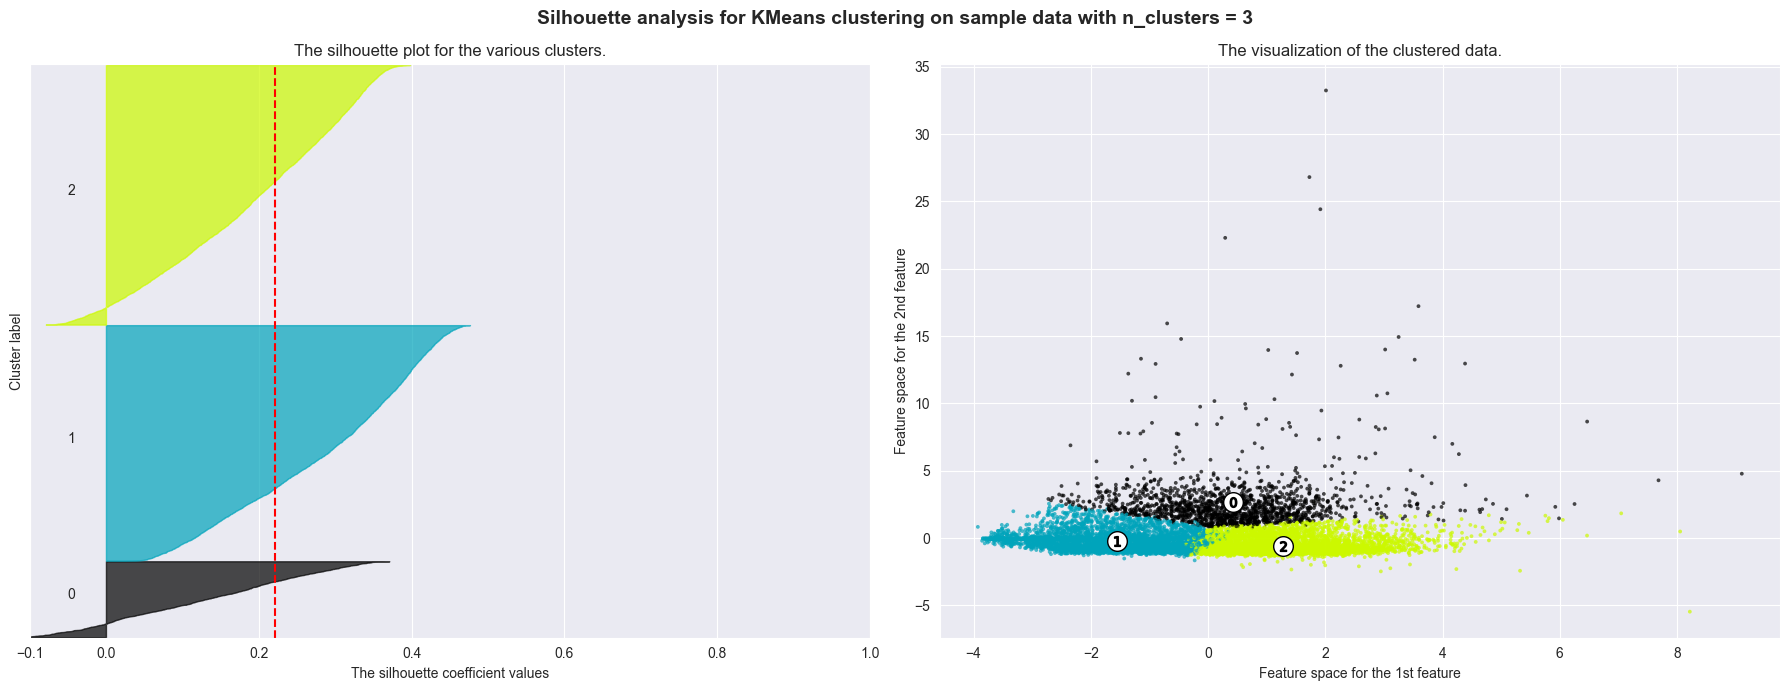

For n_clusters = 4 The average silhouette_score is : 0.19008644733371566


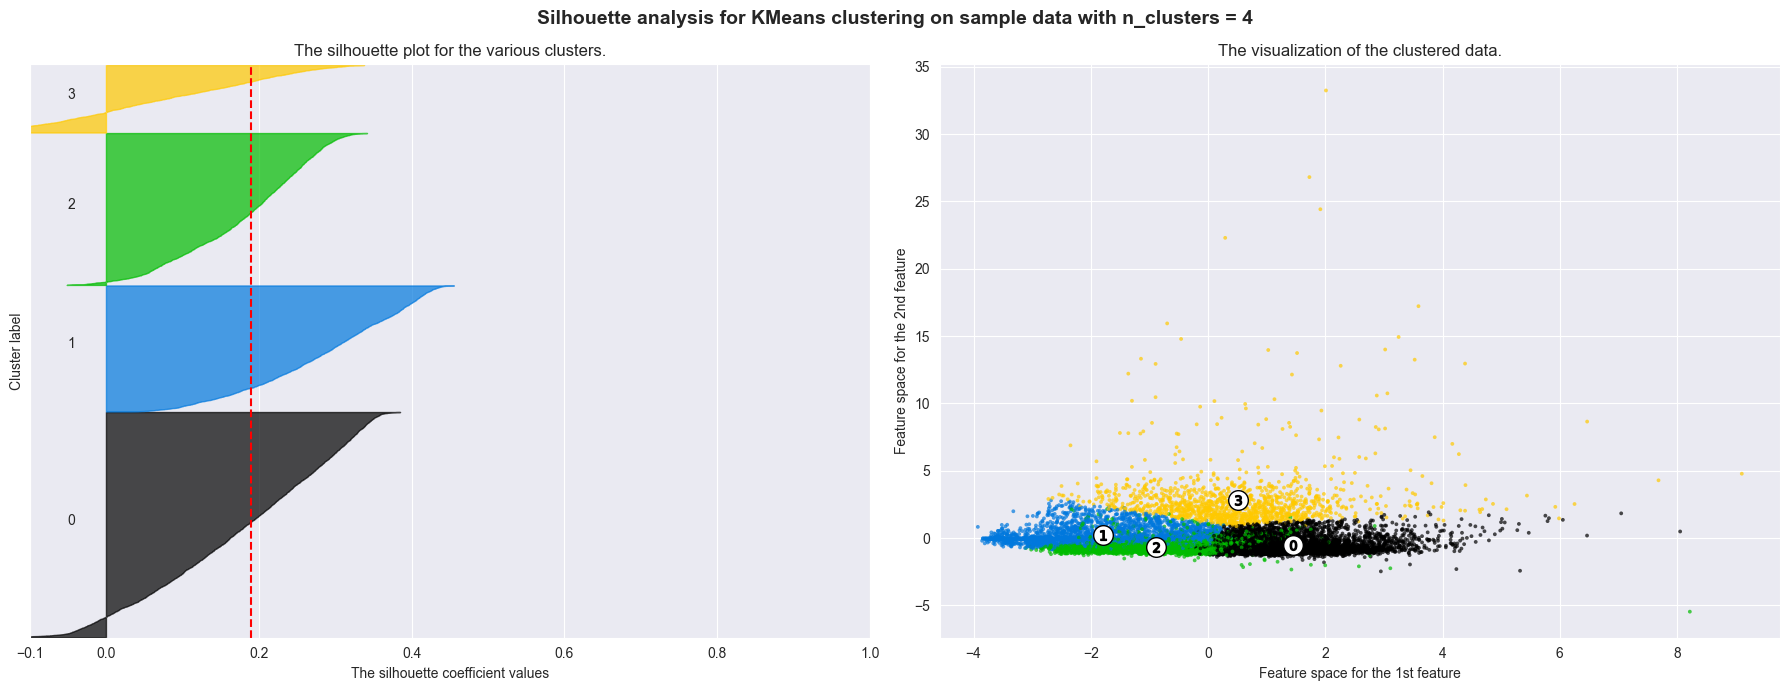

For n_clusters = 5 The average silhouette_score is : 0.2132951859443999


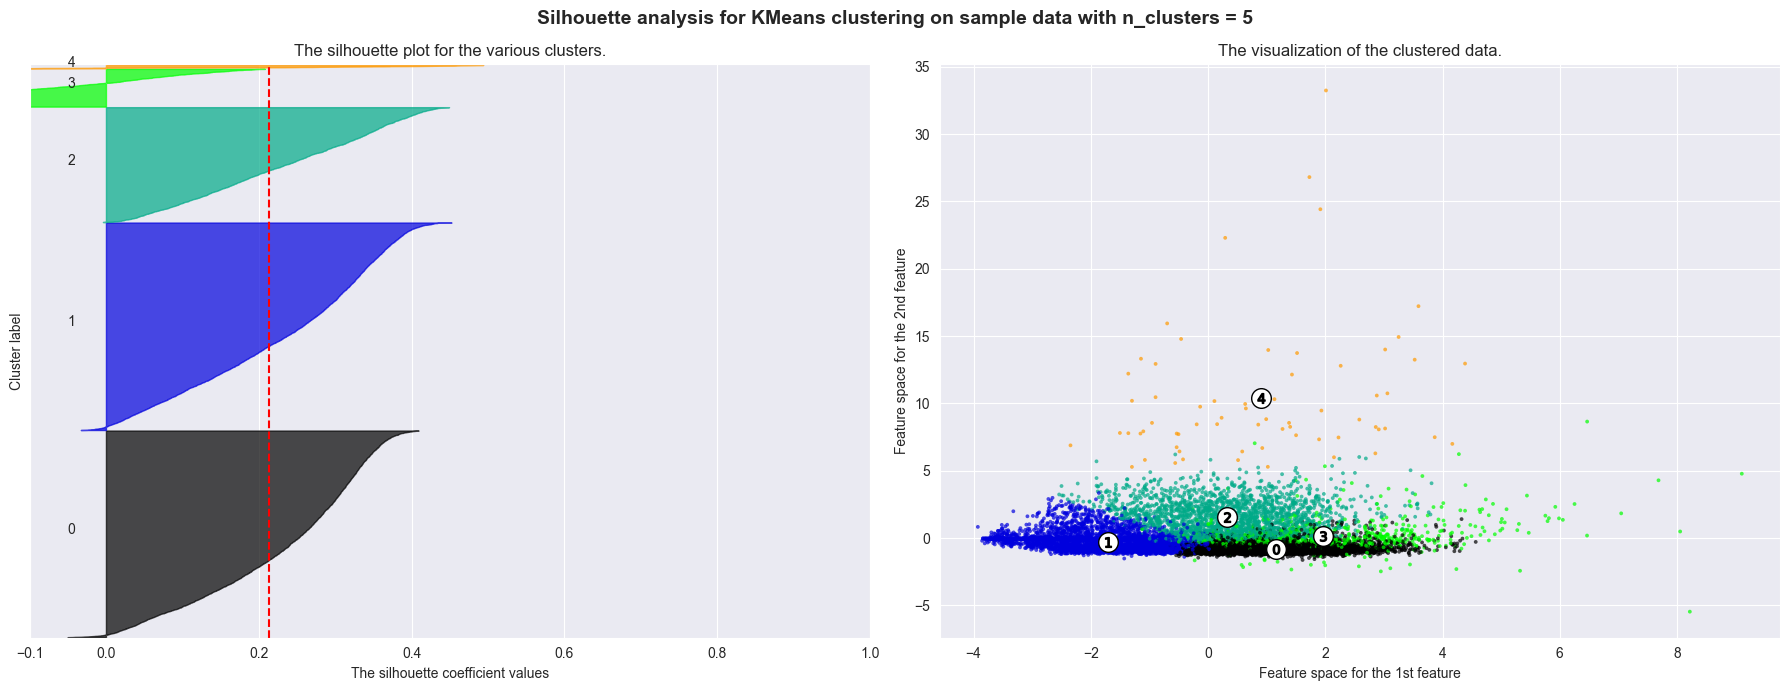

For n_clusters = 6 The average silhouette_score is : 0.2066966915566421


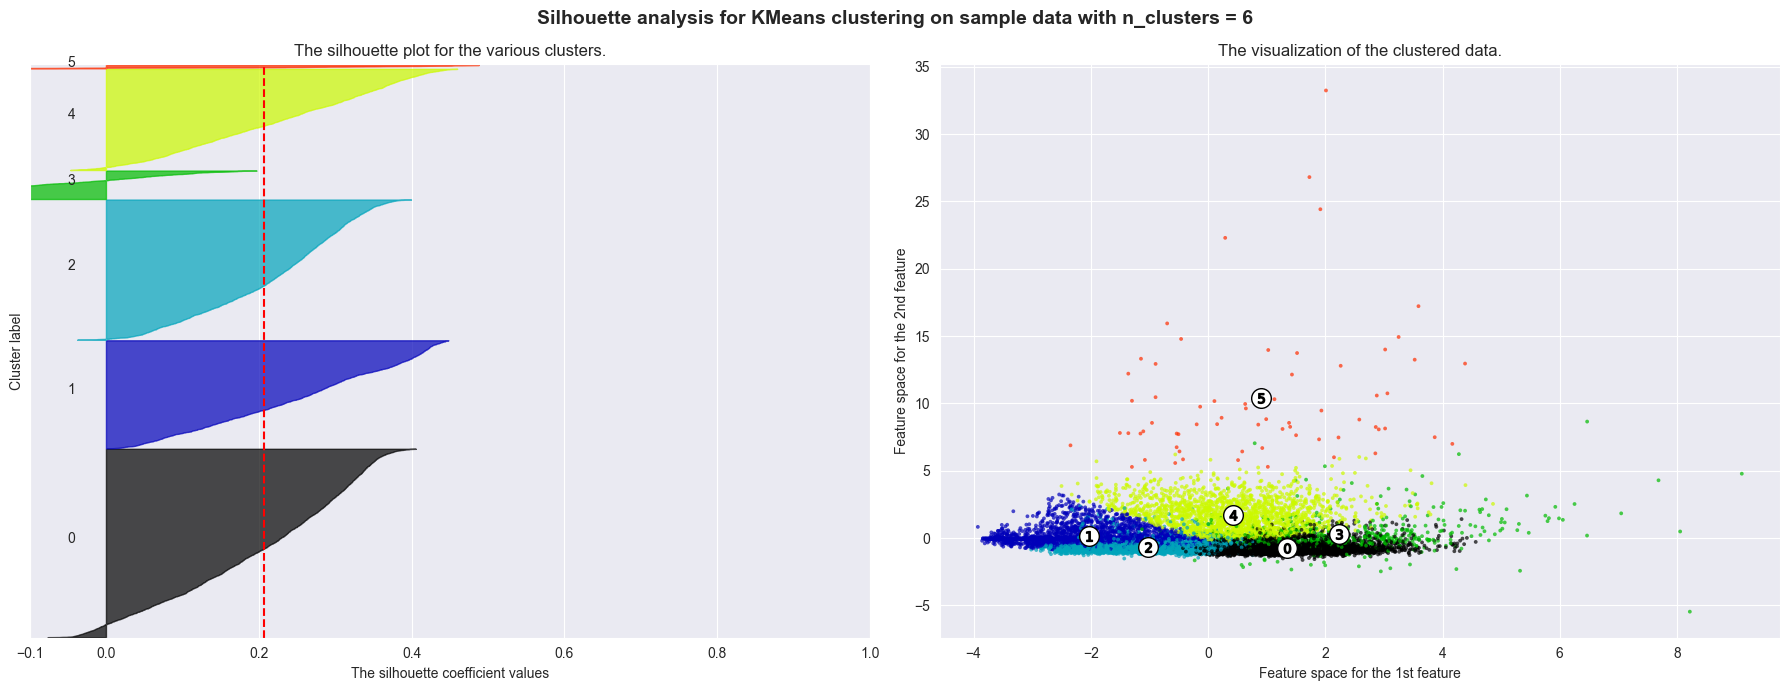

For n_clusters = 7 The average silhouette_score is : 0.2135190651839411


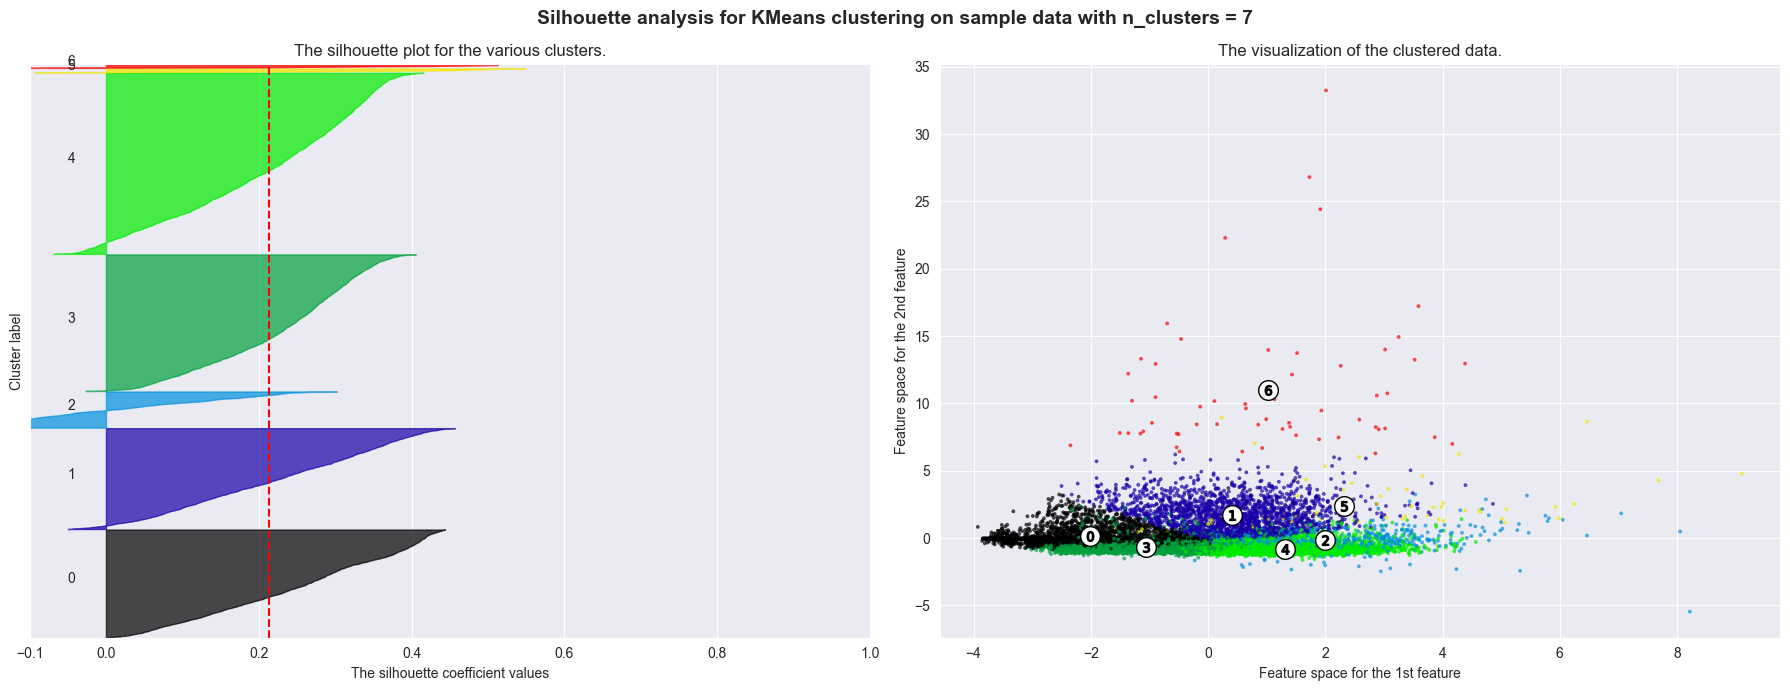

For n_clusters = 8 The average silhouette_score is : 0.1999872807838748


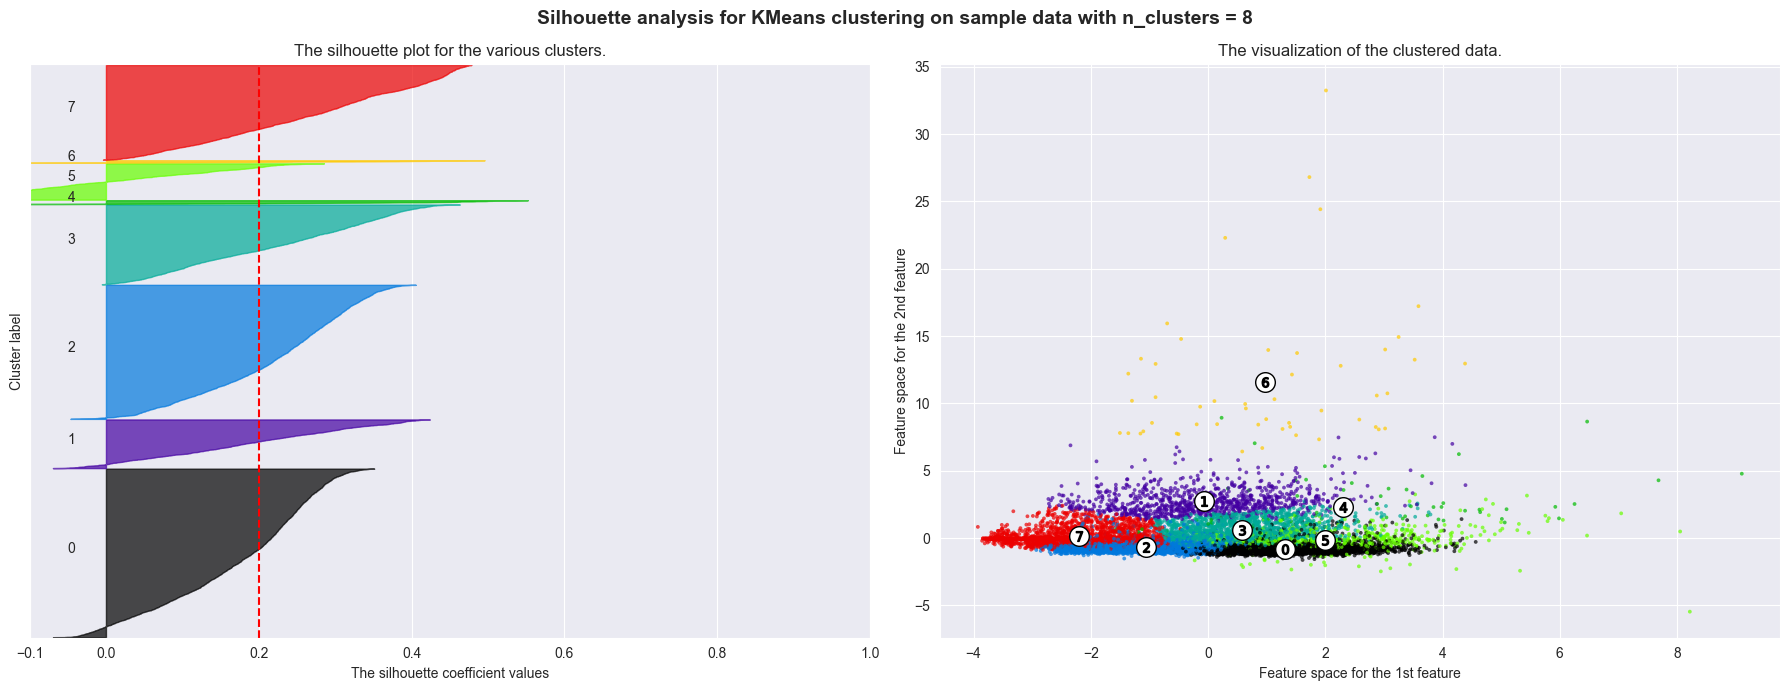

For n_clusters = 9 The average silhouette_score is : 0.20499261147343328


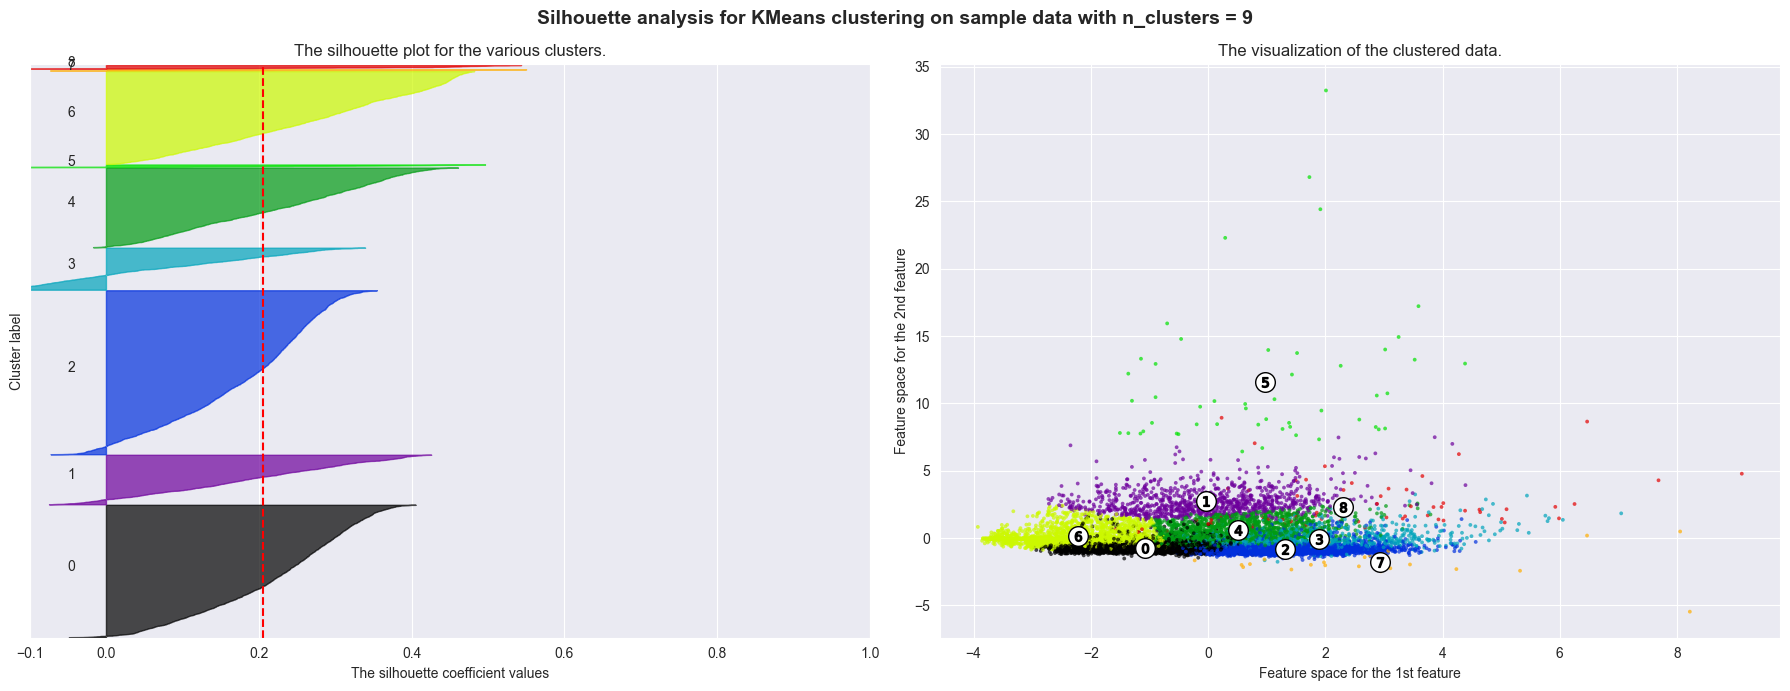

For n_clusters = 10 The average silhouette_score is : 0.19393733901081842


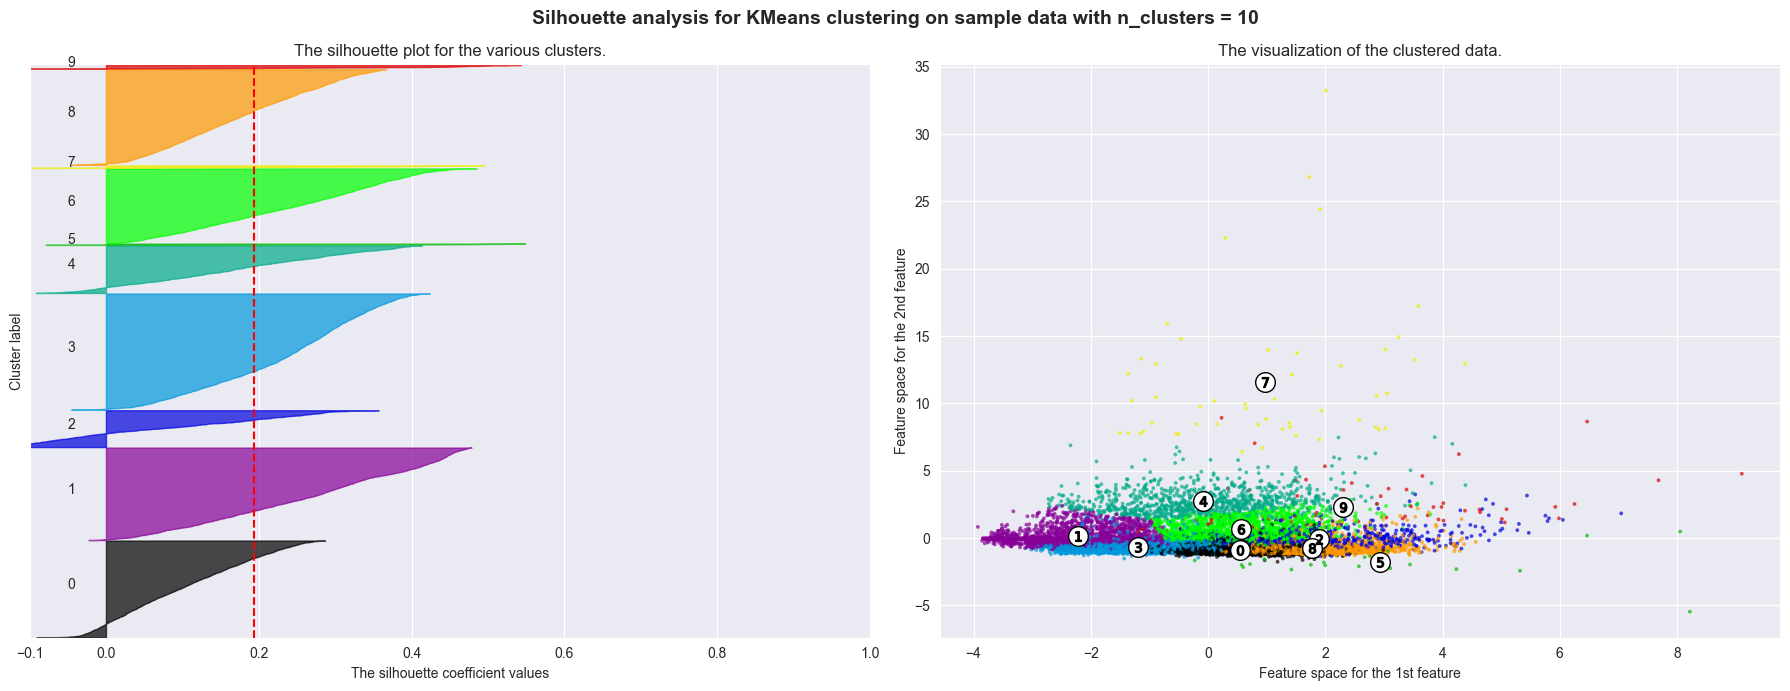

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.decomposition import PCA
import matplotlib.cm as cm

# 1. Prepare data for clustering
# Separate numerical and categorical features
numerical_features = ['base', 'bonus', 'overtime_pay', 'other', 'age', 
                      'duration_total', 'duration_entity', 'duration_nominal', 'duration_overtime']
categorical_features = ['sector', 'section_07', 'sex', 'education', 'contract']

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# Fit and transform the data
X_processed = preprocessor.fit_transform(df[numerical_features + categorical_features])

# 2. Determine the optimal number of clusters using the Elbow Method and Silhouette Score
def find_optimal_clusters(data, max_k):
    inertias = []
    silhouette_scores = []
    k_values = range(2, max_k+1)

    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(data)
        inertias.append(kmeans.inertia_)

        # Calculate silhouette score
        labels = kmeans.labels_
        silhouette_avg = silhouette_score(data, labels)
        silhouette_scores.append(silhouette_avg)
        print(f"For n_clusters = {k}, the silhouette score is {silhouette_avg:.3f}")

    # Plot Elbow Method
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(k_values, inertias, 'o-')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method for Optimal k')
    plt.grid(True)

    # Plot Silhouette Scores
    plt.subplot(1, 2, 2)
    plt.plot(k_values, silhouette_scores, 'o-')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score for Optimal k')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    # Create detailed silhouette plots for each number of clusters
    plot_silhouette_analysis(data, k_values)

    return inertias, silhouette_scores

def plot_silhouette_analysis(X, range_n_clusters):
    """
    Create silhouette plots for different numbers of clusters.

    Parameters:
    -----------
    X : array-like
        The data to be clustered
    range_n_clusters : list
        List of number of clusters to try
    """
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        # Apply PCA to reduce dimensions for visualization if data has more than 2 dimensions
        if X.shape[1] > 2:
            pca = PCA(n_components=2)
            X_pca = pca.fit_transform(X)
            X_plot = X_pca
        else:
            X_plot = X

        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(
            X_plot[:, 0], X_plot[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )

        # Labeling the clusters
        centers = clusterer.cluster_centers_

        # If we used PCA, we need to transform the centers as well
        if X.shape[1] > 2:
            centers_pca = pca.transform(centers)
            centers_plot = centers_pca
        else:
            centers_plot = centers

        # Draw white circles at cluster centers
        ax2.scatter(
            centers_plot[:, 0],
            centers_plot[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers_plot):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

        plt.tight_layout()
        plt.show()

# Find the optimal number of clusters
inertias, silhouette_scores = find_optimal_clusters(X_processed, 10)


## Silhouette Analysis
The silhouette plots above provide a detailed view of how well each sample fits within its assigned cluster. Each silhouette plot shows:

1. **Left panel**: The silhouette coefficient for each sample in each cluster. The silhouette coefficient ranges from -1 to 1:
   - Values near 1 indicate the sample is well-matched to its own cluster and poorly-matched to neighboring clusters
   - Values near 0 indicate the sample is on or very close to the decision boundary between two clusters
   - Negative values indicate the sample might have been assigned to the wrong cluster

2. **Right panel**: The actual clusters visualized in a 2D space (using PCA for dimensionality reduction if needed).

The red dashed line represents the average silhouette score across all samples. Ideally, we want:
- Most samples to have silhouette values higher than the average
- Clusters with similar widths, indicating balanced cluster sizes
- Few or no samples with negative silhouette values

The optimal number of clusters is typically the one that maximizes the average silhouette score while maintaining good cluster separation and balance.


In [ ]:
# 3. Apply K-means clustering with the optimal number of clusters
# Based on the elbow method and silhouette scores, choose optimal k
# Note: The optimal_k value should be adjusted based on the results of the plots above
optimal_k = 4  # This should be adjusted after seeing the elbow plot

# Apply K-means with the optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_processed)

# Add cluster labels to the original dataframe
df['cluster'] = cluster_labels

# 4. Visualize the clusters using PCA for dimensionality reduction
# Apply PCA to reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_processed)

# Plot the clusters
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap=cm.tab10, alpha=0.7)
plt.colorbar(scatter, label='Cluster')
plt.title('Clusters Visualization using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True, alpha=0.3)
plt.show()


The PCA plot above shows the clusters in a 2-dimensional space. Principal Component Analysis (PCA) is used to reduce the dimensionality of our data while preserving as much variance as possible. This allows us to visualize the high-dimensional data in a 2D plot.


In [ ]:
# 5. Analyze cluster characteristics
# Calculate mean values for each numerical feature by cluster
cluster_means = df.groupby('cluster')[numerical_features].mean()
print("\nCluster Means for Numerical Features:")
print(cluster_means)

# Create a heatmap of the cluster means
plt.figure(figsize=(14, 8))
sns.heatmap(cluster_means, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=.5)
plt.title('Cluster Means for Numerical Features')
plt.tight_layout()
plt.show()


In [ ]:
# Analyze categorical features distribution within each cluster
for feature in categorical_features:
    plt.figure(figsize=(14, 8))
    for i in range(optimal_k):
        plt.subplot(1, optimal_k, i+1)
        cluster_data = df[df['cluster'] == i]

        if feature == 'sex':
            cluster_data['sex_label'] = cluster_data['sex'].map({1: 'man', 2: 'woman'})
            sns.countplot(y='sex_label', data=cluster_data)
            plt.title(f'Cluster {i}: Sex Distribution')
        elif feature == 'sector':
            cluster_data['sector_label'] = cluster_data['sector'].map({1: 'public', 2: 'private'})
            sns.countplot(y='sector_label', data=cluster_data)
            plt.title(f'Cluster {i}: Sector Distribution')
        elif feature == 'section_07':
            cluster_data['section_07_label'] = cluster_data['section_07'].map({
                1: 'Public Admin', 
                2: 'Education', 
                3: 'Health & Social'
            })
            sns.countplot(y='section_07_label', data=cluster_data)
            plt.title(f'Cluster {i}: Section Distribution')
        elif feature == 'education':
            cluster_data['education_label'] = cluster_data['education'].map({
                1: 'doctorate', 
                2: 'higher', 
                3: 'post-secondary', 
                4: 'secondary', 
                5: 'basic vocational', 
                6: 'middle school and below'
            })
            sns.countplot(y='education_label', data=cluster_data)
            plt.title(f'Cluster {i}: Education Distribution')
        elif feature == 'contract':
            cluster_data['contract_label'] = cluster_data['contract'].map({
                1: 'indefinite', 
                2: 'definite'
            })
            sns.countplot(y='contract_label', data=cluster_data)
            plt.title(f'Cluster {i}: Contract Distribution')

    plt.tight_layout()
    plt.show()


In [ ]:
# 6. Summarize the findings
print("\nCluster Sizes:")
print(df['cluster'].value_counts())

# Calculate the percentage of each cluster
cluster_percentages = (df['cluster'].value_counts() / len(df) * 100).round(2)
print("\nCluster Percentages:")
print(cluster_percentages)

# Create a pie chart of cluster sizes
plt.figure(figsize=(10, 8))
plt.pie(cluster_percentages, labels=[f'Cluster {i} ({p}%)' for i, p in 
                                    zip(cluster_percentages.index, cluster_percentages)],
        autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Cluster Size Distribution')
plt.axis('equal')
plt.show()


In [ ]:
# 7. Interpret the clusters
print("\nCluster Interpretation:")
for i in range(optimal_k):
    print(f"\nCluster {i}:")
    # Get the top 3 distinguishing numerical features
    cluster_profile = cluster_means.loc[i] - cluster_means.mean()
    top_features = cluster_profile.abs().sort_values(ascending=False).head(3).index

    for feature in top_features:
        if cluster_profile[feature] > 0:
            print(f"- Higher {feature}: {cluster_means.loc[i, feature]:.2f} vs overall mean {cluster_means[feature].mean():.2f}")
        else:
            print(f"- Lower {feature}: {cluster_means.loc[i, feature]:.2f} vs overall mean {cluster_means[feature].mean():.2f}")
